In [23]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense
from keras.models import Sequential, Model
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.python.keras.utils.vis_utils import plot_model

In [62]:
faces = fetch_olivetti_faces()
face_img = faces.data
X_train, X_test, y_train, y_test = train_test_split(faces['data'], faces['target'], test_size=.1, random_state=42)

input_img = keras.Input(shape=(4096,), name="Olivetti_input")


In [6]:
encoding_dim = 260 # same as PCA for comperassion

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(4096, activation='sigmoid')(encoded)

simple_autoencoder = keras.Model(input_img, decoded)

In [7]:
encoder = keras.Model(input_img, encoded)

In [8]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = simple_autoencoder.layers[-1]
decoded = keras.Model(encoded_input,decoder_layer(encoded_input))

In [9]:
simple_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
simple_autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Olivetti_input (InputLayer)  [(None, 4096)]            0         
_________________________________________________________________
dense (Dense)                (None, 260)               1065220   
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              1069056   
Total params: 2,134,276
Trainable params: 2,134,276
Non-trainable params: 0
_________________________________________________________________


In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(360, 4096)
(40, 4096)


In [46]:
print(X_train[0][1])

0.0015394588


In [59]:
simple_autoencoder.fit(X_train, X_train, epochs=30, verbose=0, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

In [47]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoded.predict(encoded_imgs)

ValueError: in user code:

    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/steffen/Documents/skole/intelligente systemer/olivetti/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_1 is incompatible with the layer: expected axis -1 of input shape to have value 260 but received input with shape [None, 64]


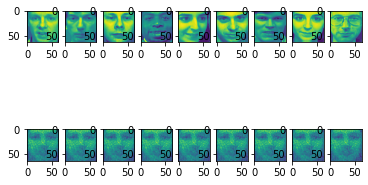

In [13]:
import matplotlib.pyplot as plt

n = 9
plt.figure()
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64,64))

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(64,64))

plt.show()

In [63]:
# More advanced autoencoder
# encoder = Sequential([Dense(units=1024, activation='relu', input_dim=64*64),
#                          Dense(units=512, activation='relu'),
#                          Dense(units=64, activation='relu')])
# decoder = Sequential([Dense(units=512, activation='relu'),
#                      Dense(units=1024, activation='relu'),
#                      Dense(units=64*64, activation='sigmoid')])

autoencoder = Sequential([Dense(units=1024, activation='relu', input_dim=64*64, name='encode_l1'),
                          Dense(units=512, activation='relu', name='encode_l2'),
                          Dense(units=64, activation='relu', name='encode_l3'),
                          Dense(units=512, activation='relu', name='decode_l1'),
                          Dense(units=1024, activation='relu', name='decode_l2'),
                          Dense(units=64*64, activation='sigmoid', name='decode_l3')])

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encode_l1 (Dense)            (None, 1024)              4195328   
_________________________________________________________________
encode_l2 (Dense)            (None, 512)               524800    
_________________________________________________________________
encode_l3 (Dense)            (None, 64)                32832     
_________________________________________________________________
decode_l1 (Dense)            (None, 512)               33280     
_________________________________________________________________
decode_l2 (Dense)            (None, 1024)              525312    
_________________________________________________________________
decode_l3 (Dense)            (None, 4096)              4198400   
Total params: 9,509,952
Trainable params: 9,509,952
Non-trainable params: 0
___________________________________________

In [68]:
history = autoencoder.fit(x=X_train, y=X_train , epochs=100, verbose=0, shuffle=True, validation_data=(X_test, X_test), batch_size=32)
print('Done!')

Done!


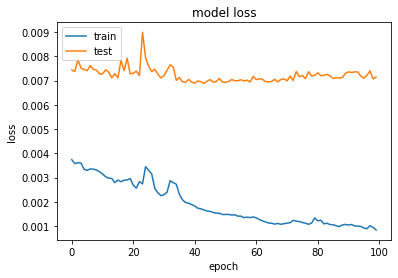

In [69]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
predictions = autoencoder.predict(x=X_test)

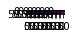

In [57]:
plt.figure(figsize=(3,3))
[n, m] = predictions.shape
for i in range(9):
    ax = plt.subplot(2, n, i+1)
    img = predictions[i].reshape(64, 64)
    plt.imshow(img)
plt.show()